In [62]:
#Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
#Load the dataset
df=pd.read_csv('drowsiness_dataset.csv.zip')

In [15]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890260 entries, 0 to 4890259
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   heartRate   float64
 1   ppgGreen    float64
 2   ppgRed      float64
 3   ppgIR       float64
 4   drowsiness  float64
dtypes: float64(5)
memory usage: 186.5 MB


In [17]:
#Data head
df.head()

,heartRate,ppgGreen,ppgRed,ppgIR,drowsiness
0,54.0,1584091.0,5970731.0,6388383.0,0.0
1,54.0,1584091.0,5971202.0,6392174.0,0.0
2,54.0,1581111.0,5971295.0,6391469.0,0.0
3,54.0,1579343.0,5972599.0,6396137.0,0.0
4,54.0,1579321.0,5971906.0,6392898.0,0.0


In [19]:
#Data describe
df.describe()

,heartRate,ppgGreen,ppgRed,ppgIR,drowsiness
count,4.890260e+06,4.890260e+06,4.890260e+06,4.890260e+06,4.890260e+06
mean,7.814245e+01,2.073589e+06,5.643653e+06,5.728191e+06,8.593592e-01
std,1.296635e+01,4.418773e+05,3.909626e+05,4.313052e+05,8.370285e-01
min,5.000000e+01,5.897580e+05,4.441989e+06,4.409976e+06,0.000000e+00
25%,6.800000e+01,1.780621e+06,5.368700e+06,5.402542e+06,0.000000e+00
50%,7.800000e+01,2.044658e+06,5.646039e+06,5.818748e+06,1.000000e+00
75%,8.700000e+01,2.333117e+06,5.927128e+06,6.016016e+06,2.000000e+00
max,1.190000e+02,3.530798e+06,6.842637e+06,7.061799e+06,2.000000e+00


In [254]:
#Data Loading and Familiarising
print(df.head())
print('\n')
print(df.info())
print('\n')
print(df.describe())

   heartRate   ppgGreen     ppgRed      ppgIR  drowsiness  heart_rate  \
0       54.0  1584091.0  5970731.0  6388383.0         0.0        54.0   
1       54.0  1584091.0  5971202.0  6392174.0         0.0        54.0   
2       54.0  1581111.0  5971295.0  6391469.0         0.0        54.0   
3       54.0  1579343.0  5972599.0  6396137.0         0.0        54.0   
4       54.0  1579321.0  5971906.0  6392898.0         0.0        54.0   

   ppgGreen_cleaned  ppgRed_cleaned  ppgIR_cleaned  heartRate_cleaned  
0         1584091.0       5970731.0      6388383.0               54.0  
1         1584091.0       5971202.0      6392174.0               54.0  
2         1581111.0       5971295.0      6391469.0               54.0  
3         1579343.0       5972599.0      6396137.0               54.0  
4         1579321.0       5971906.0      6392898.0               54.0  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890260 entries, 0 to 4890259
Data columns (total 10 columns):
 #   Column   

In [31]:
#Check for any missing values
print(df.isnull().sum())

heartRate     0
ppgGreen      0
ppgRed        0
ppgIR         0
drowsiness    0
dtype: int64


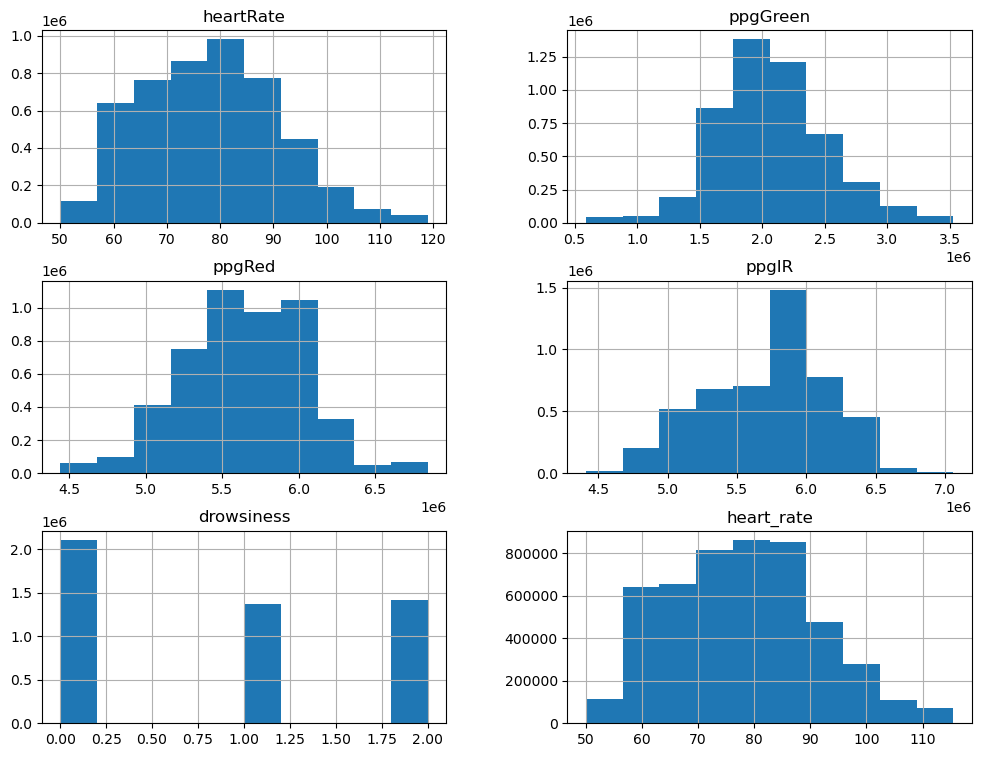

In [218]:
#Histogram
df.hist(bins=10, figsize=(12,9))
plt.show()

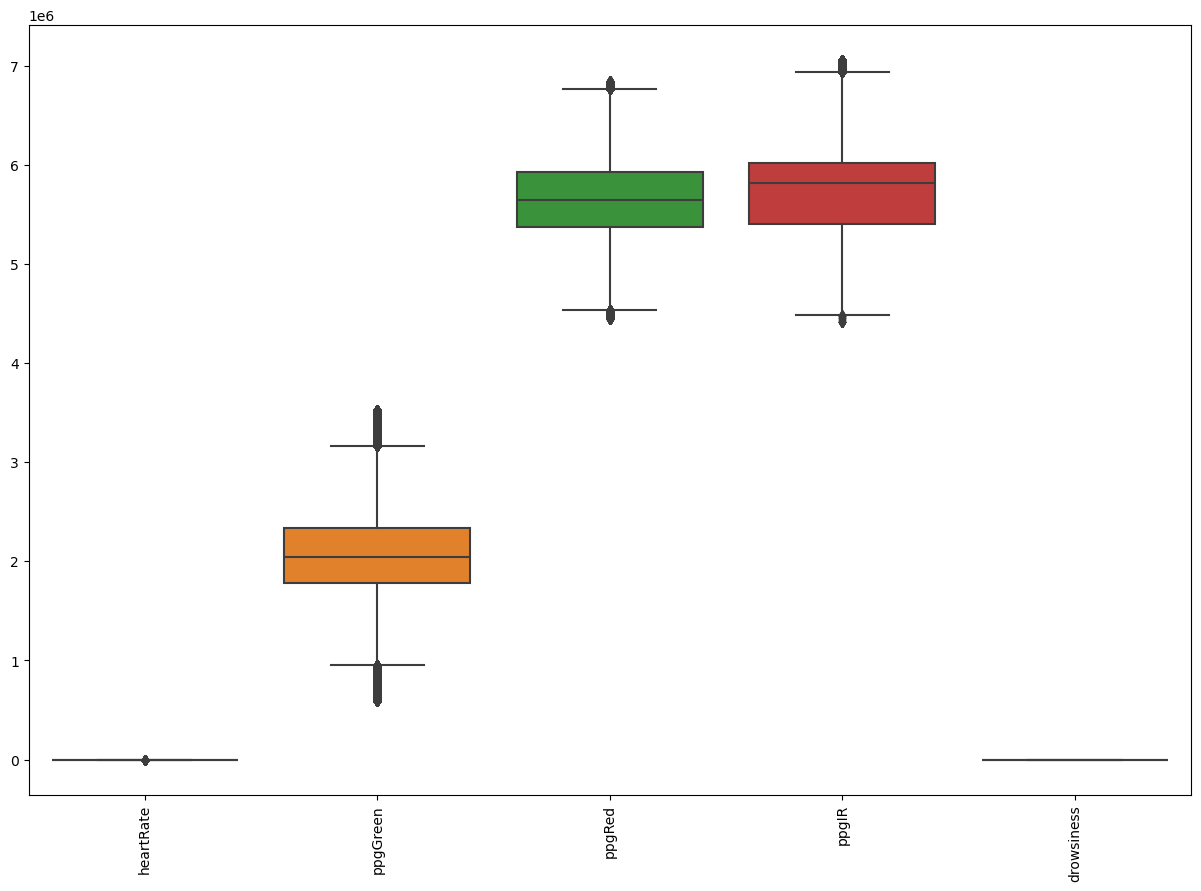

In [39]:
#Box plot
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


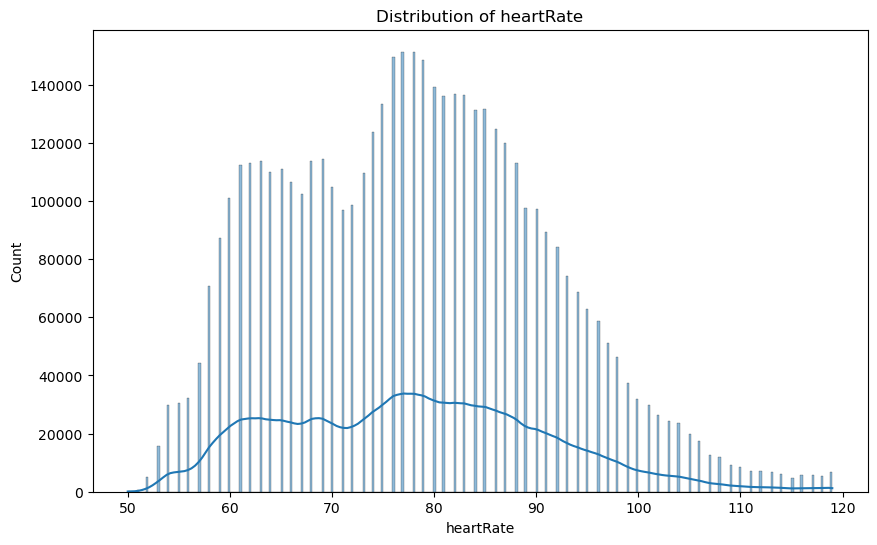

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


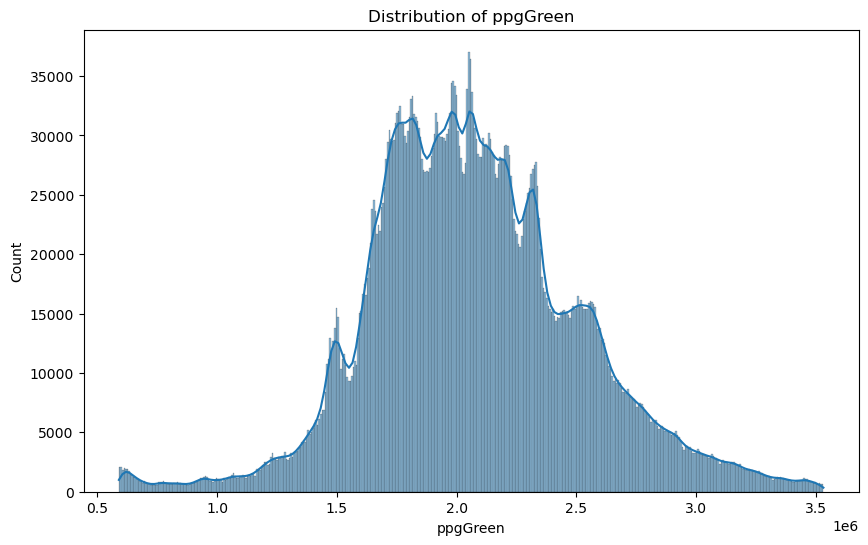

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


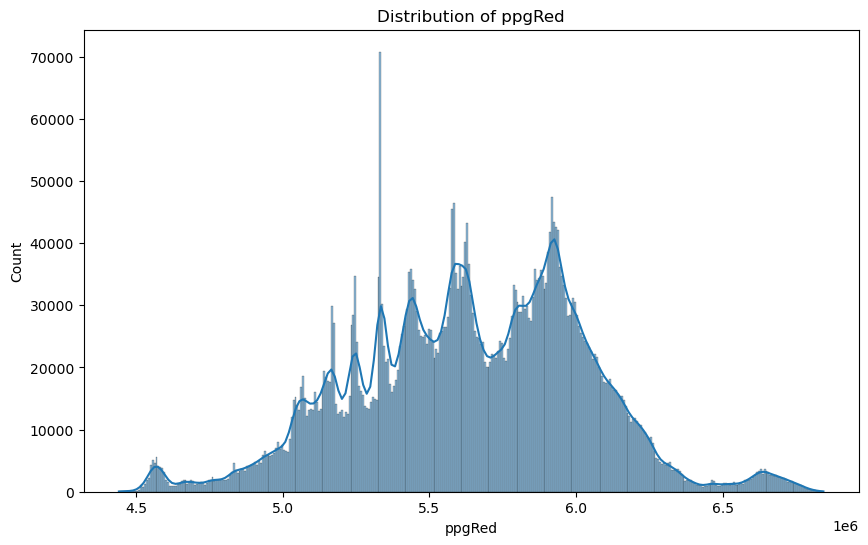

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


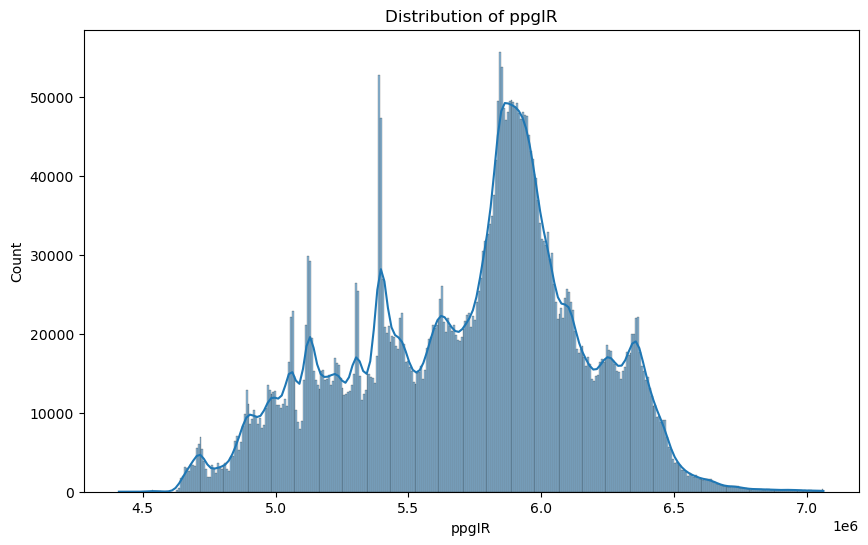

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


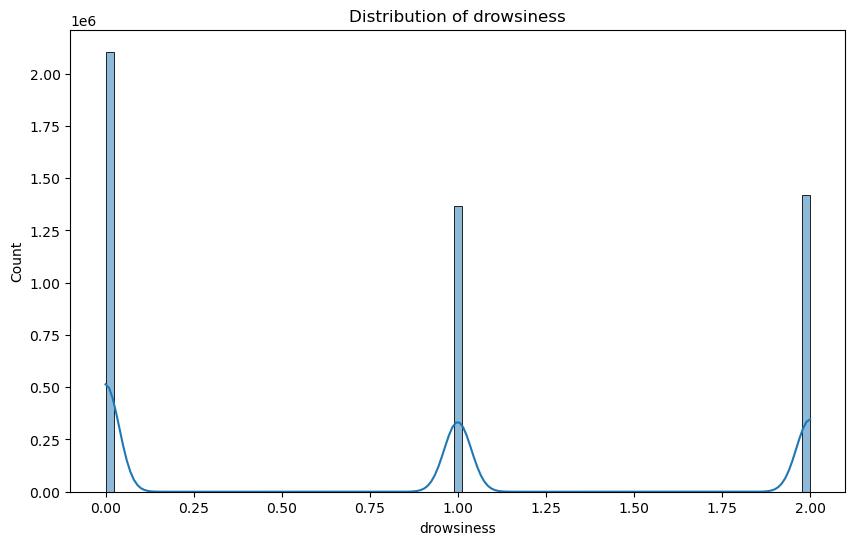

In [51]:
for i in df:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


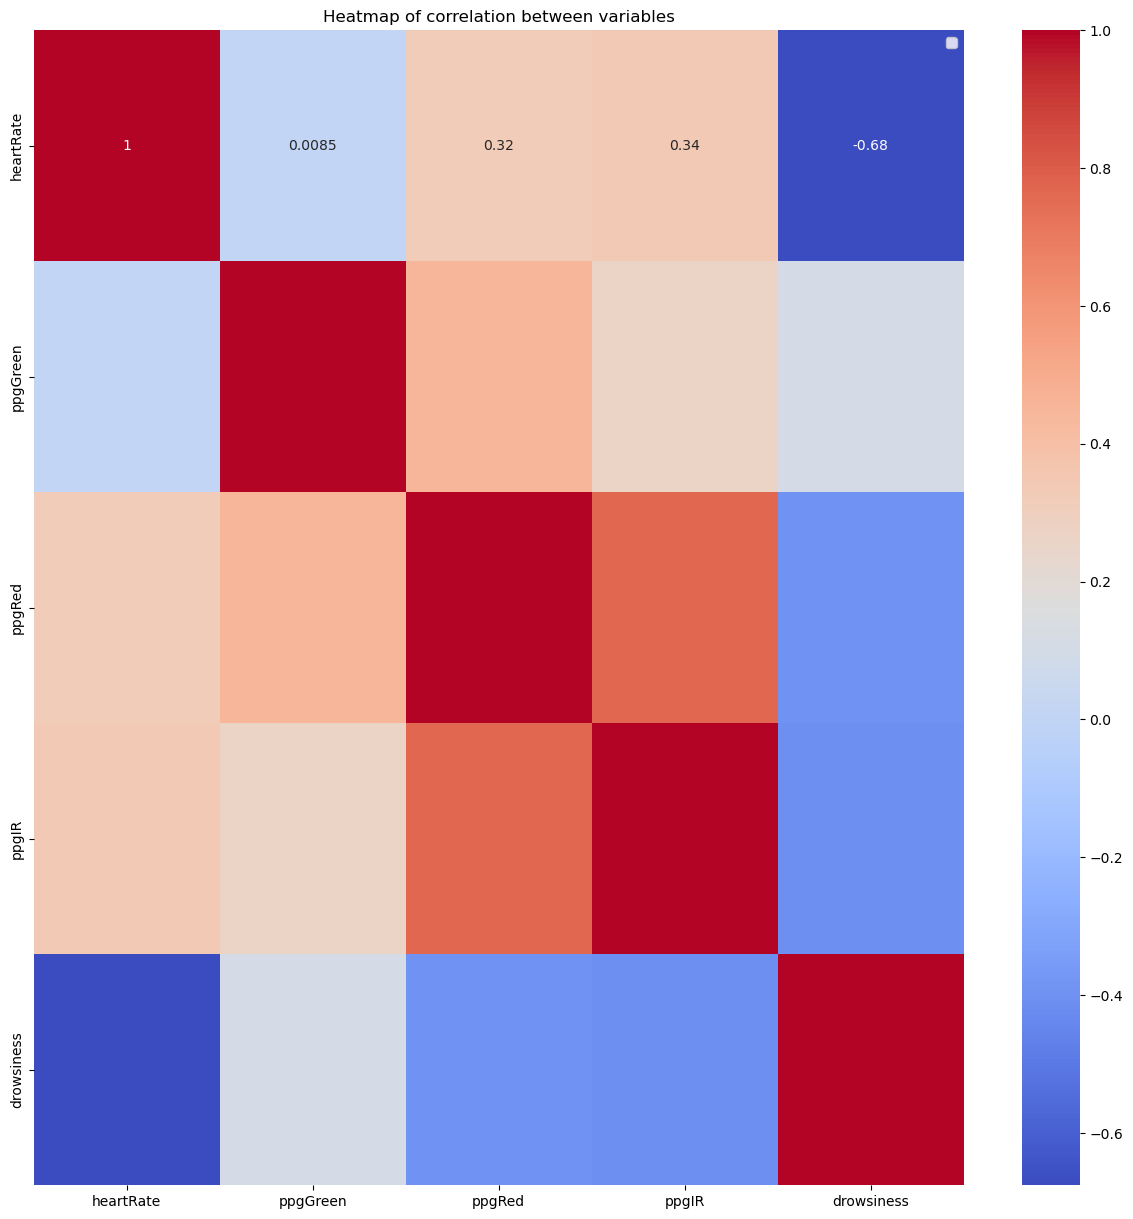

In [194]:
corr_matrix= df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of correlation between variables')
plt.legend()
plt.show()

In [66]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
from scipy import stats

In [68]:
#Define the number of periods
num_periods=4

#Calculate the size of each period
period_size=len(df)//num_periods

#create a period column
period_labels=['Morning','Aftermppm','Evening','Night']
df['Period']=pd.cut(df.index,bins=num_periods,labels=period_labels)

In [72]:
#Check the distribution of the periods
print(df['Period'].value_counts())

Period
Morning      1222565
Aftermppm    1222565
Evening      1222565
Night        1222565
Name: count, dtype: int64


In [74]:
#Segment the data by period

morning_data=df[df['Period']=='Morning']
afternoon_data=df[df['Period']=='Afternoon']
evening_data=df[df['Period']=='Evening']
night_data=df[df['Period']=='Night']

In [196]:
#Analyzing and visualizing the correlations for each period:

#Calculate and visualise the correlation between drowsiness levels and other variables(hear rate and PPG readings) for each period seperately.


def calculate_and_plot_correlations(data,period_name):
    correlation_heartRate=data['drowsiness'].corr(data['heartRate'])
    correlation_ppgGreen=data['drowsiness'].corr(data['ppgGreen'])
    correlation_ppgRed=data['drowsiness'].corr(data['ppgRed'])
    correlation_ppgIR=data['drowsiness'].corr(data['ppgIR'])

print(f'Correlation between drowsiness and heart rate ({period_name}):{correlation_heartRate}')
print(f'Correlation between drowsiness and PPG Green ({period_name}):{correlation_ppgGreen}')
print(f'Correlation between drowsiness and PPG Red ({period_name}):{correlation_ppgRed}')
print(f'Correlation between drowsiness and PPG IR ({period_name}):{correlation_ppgIR}')

plt.scatter(data['heartRate'],data['drowsiness'],alpha=0.5,label='Heart Rate')
plt.scatter(data['ppgGreen'],data['drowsiness'],alpha=0.5,label='PPG Green', color='green')
plt.scatter(data['ppgRed'],data['drowsiness'],alpha=0.5,label='PPG Red', color='red')
plt.scatter(data['ppgIR'],data['drowsiness'],alpha=0.5,label='PPG IR', color='purple')
plt.title(f'Drowsiness levels Vs. Heart rate and PPG Readings ({period_name}')
plt.xlabel('Activity level')
plt.ylabel('Drowsiness Level')
plt.legend()
plt.show()

calculate_and_plot_correlations(morning_data,'Morning')
calculate_and_plot_correlations(afternoon_data,'Afternoon')
calculate_and_plot_correlations(evening_data,'Evening')
calculate_and_plot_correlations(night_data,'Night')

NameError: name 'period_name' is not defined

In [252]:
# ANOVA test to compare heart rates across drowsiness levels

drowsiness_levels = df['drowsiness'].unique()
heart_rates = [df[df['drowsiness'] == i]['heartRate'] for i in drowsiness_levels]
f_statistic, p_value = stats.f_oneway(*heart_rates)
print(f"ANOVA results heartrate: F-statistic = {f_statistic}, p-value = {p_value}")


drowsiness_levels = df['drowsiness'].unique()
ppgGreen_levels = [df[df['drowsiness'] == i]['ppgGreen'] for i in drowsiness_levels]
f_statistic, p_value = stats.f_oneway(*ppgGreen_levels)
print(f"ANOVA results ppgGreen: F-statistic = {f_statistic}, p-value = {p_value}")


drowsiness_levels = df['drowsiness'].unique()
ppgRed_levels = [df[df['drowsiness'] == i]['ppgRed'] for i in drowsiness_levels]
f_statistic, p_value = stats.f_oneway(*ppgRed_levels)
print(f"ANOVA results ppgRed: F-statistic = {f_statistic}, p-value = {p_value}")


drowsiness_levels = df['drowsiness'].unique()
ppgIR_levels = [df[df['drowsiness'] == i]['ppgIR'] for i in drowsiness_levels]
f_statistic, p_value = stats.f_oneway(*ppgIR_levels)
print(f"ANOVA results ppgIR: F-statistic = {f_statistic}, p-value = {p_value}")

ANOVA results heartrate: F-statistic = 2256845.7001167205, p-value = 0.0
ANOVA results ppgGreen: F-statistic = 60758.16828651622, p-value = 0.0
ANOVA results ppgRed: F-statistic = 436362.17633283796, p-value = 0.0
ANOVA results ppgIR: F-statistic = 549350.4240909232, p-value = 0.0


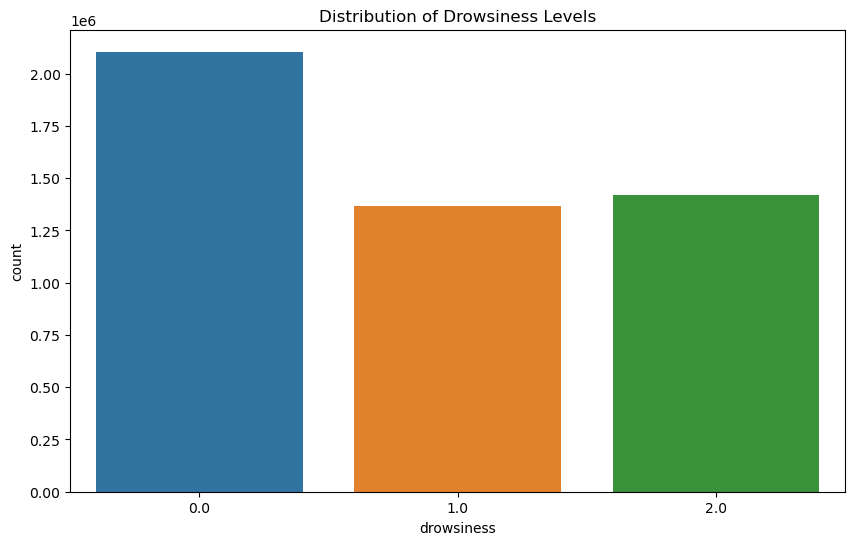

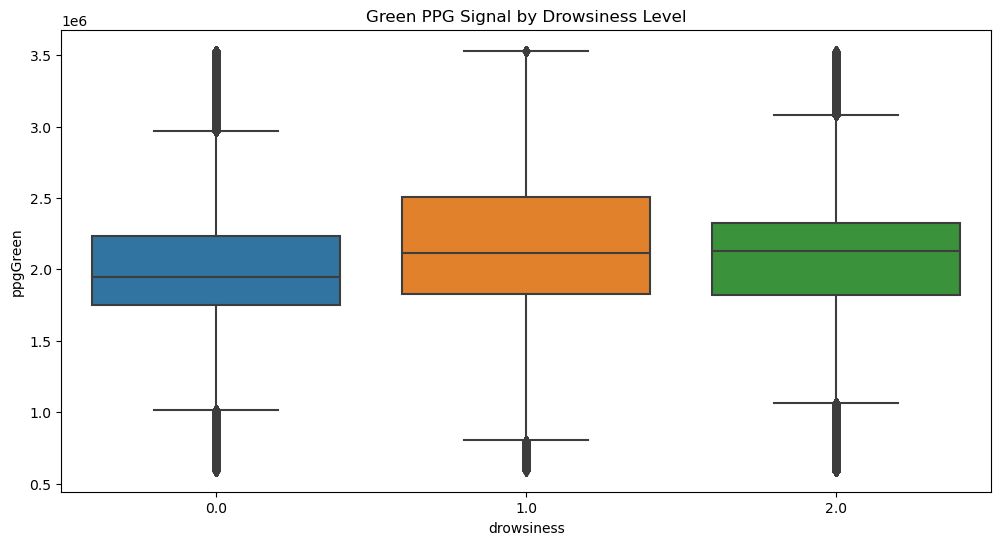

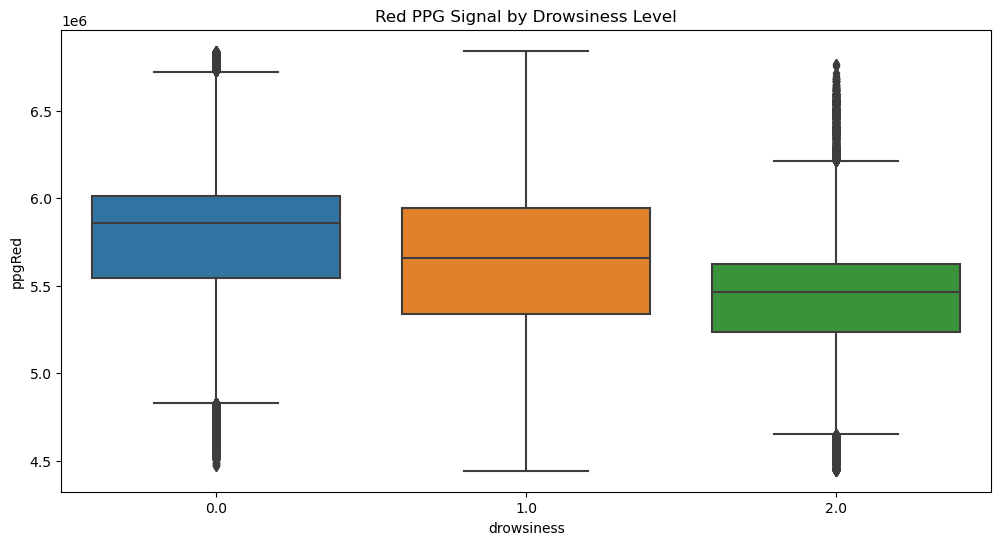

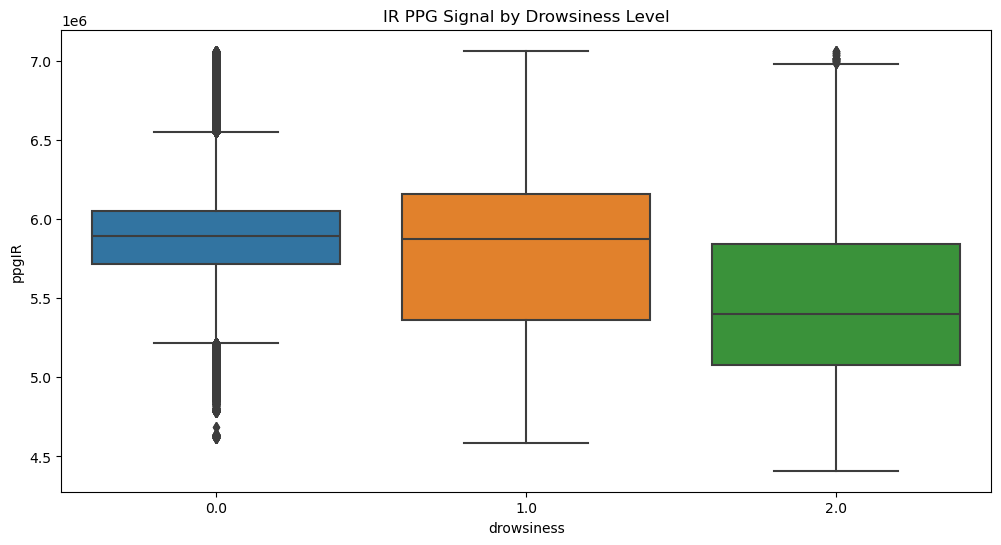

In [214]:
# Distribution of drowsiness levels
plt.figure(figsize=(10, 6))
sns.countplot(x='drowsiness', data=df)
plt.title('Distribution of Drowsiness Levels')
plt.show()

# Box plots for PPG signals across drowsiness levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='drowsiness', y='ppgGreen', data=df)
plt.title('Green PPG Signal by Drowsiness Level')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='drowsiness', y='ppgRed', data=df)
plt.title('Red PPG Signal by Drowsiness Level')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='drowsiness', y='ppgIR', data=df)
plt.title('IR PPG Signal by Drowsiness Level')
plt.show()

In [240]:

# Outliers (IQR method)

Q1 = df['heartRate'].quantile(0.25)
Q3 = df['heartRate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_range = Q1 - 1.5 * IQR
upper_bound_range = Q3 + 1.5 * IQR
df['heartRate_cleaned'] = df['heartRate'].clip(lower_bound_range, upper_bound_range)

Q1 = df['ppgGreen'].quantile(0.25)
Q3 = df['ppgGreen'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_range = Q1 - 1.5 * IQR
upper_bound_range = Q3 + 1.5 * IQR
df['ppgGreen_cleaned'] = df['ppgGreen'].clip(lower_bound_range, upper_bound_range)


Q1 = df['ppgRed'].quantile(0.25)
Q3 = df['ppgRed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_range = Q1 - 1.5 * IQR
upper_bound_range = Q3 + 1.5 * IQR
df['ppgRed_cleaned'] = df['ppgRed'].clip(lower_bound_range, upper_bound_range)

Q1 = df['ppgIR'].quantile(0.25)
Q3 = df['ppgIR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_range = Q1 - 1.5 * IQR
upper_bound_range = Q3 + 1.5 * IQR
df['ppgIR_cleaned'] = df['ppgIR'].clip(lower_bound_range, upper_bound_range)

df

,heartRate,ppgGreen,ppgRed,ppgIR,drowsiness,heart_rate,ppgGreen_cleaned,ppgRed_cleaned,ppgIR_cleaned,heartRate_cleaned
0,54.0,1584091.0,5970731.0,6388383.0,0.0,54.0,1584091.0,5970731.0,6388383.0,54.0
1,54.0,1584091.0,5971202.0,6392174.0,0.0,54.0,1584091.0,5971202.0,6392174.0,54.0
2,54.0,1581111.0,5971295.0,6391469.0,0.0,54.0,1581111.0,5971295.0,6391469.0,54.0
3,54.0,1579343.0,5972599.0,6396137.0,0.0,54.0,1579343.0,5972599.0,6396137.0,54.0
4,54.0,1579321.0,5971906.0,6392898.0,0.0,54.0,1579321.0,5971906.0,6392898.0,54.0
...,...,...,...,...,...,...,...,...,...,...
4890255,63.0,2286384.0,5783226.0,6356797.0,2.0,63.0,2286384.0,5783226.0,6356797.0,63.0
4890256,63.0,2289887.0,5783786.0,6357004.0,2.0,63.0,2289887.0,5783786.0,6357004.0,63.0
4890257,63.0,2291928.0,5784221.0,6358348.0,2.0,63.0,2291928.0,5784221.0,6358348.0,63.0
4890258,63.0,2295386.0,5785012.0,6358565.0,2.0,63.0,2295386.0,5785012.0,6358565.0,63.0


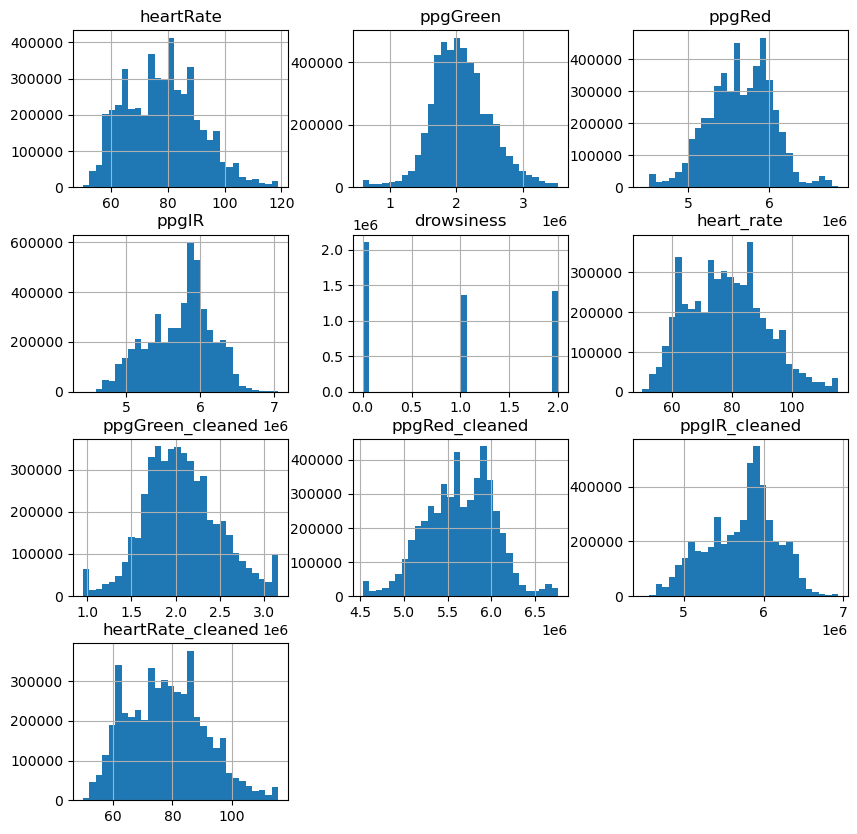

In [248]:
#Histogram
df.hist(bins=30, figsize=(10,10))
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


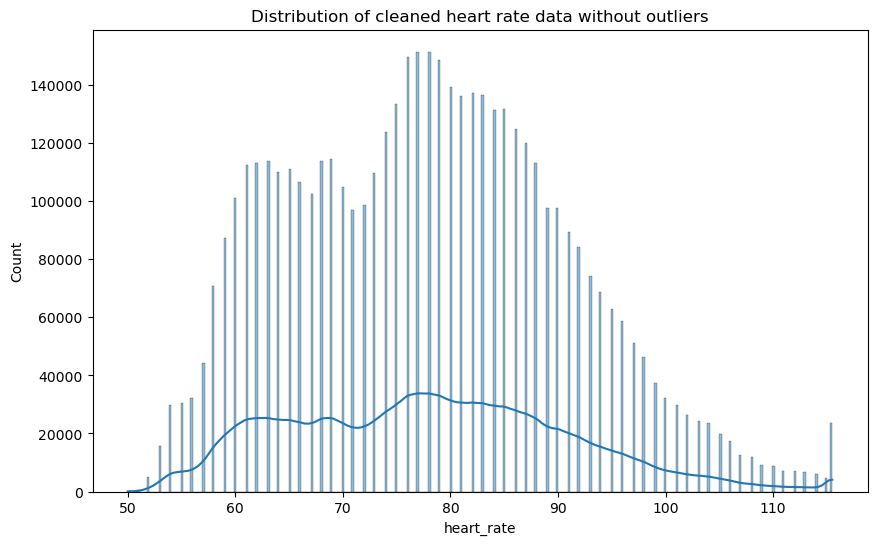

In [236]:
plt.figure(figsize=(10, 6))
sns.histplot(df['heart_rate'], kde=True)
plt.title(f'Distribution of cleaned heart rate data without outliers')
plt.show()